Loading required dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Laoding data into the program and then renaming the columns as we expect it to be:

In [8]:
data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
#columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
df = pd.read_csv(data, header=None, names = columns)

# Assigning column names
df.columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']

Visualize feature relationships and observe a couple data on the set to verify:

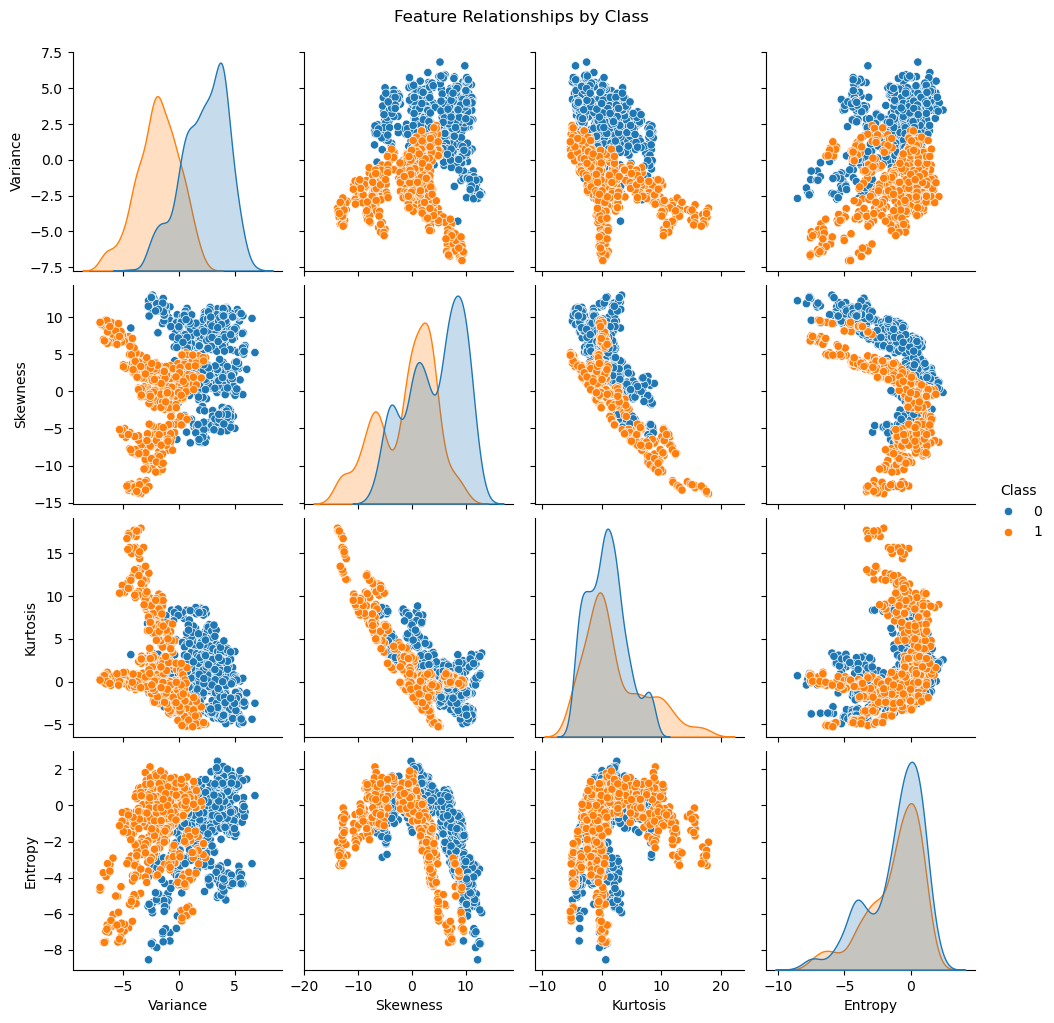

In [9]:
# Visualize feature relationships (pairplot)
sns.pairplot(df, hue='Class')
plt.suptitle("Feature Relationships by Class", y=1.02)
plt.show()

Splitting the data:

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creating the tree:

In [12]:
# We may try and visualize different decision tree structures by changing 'max_depth' and 'min_samples_split'
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)

Prediction and creating "Classification Report" and "Confusion Matrix" for the result:

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.99      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



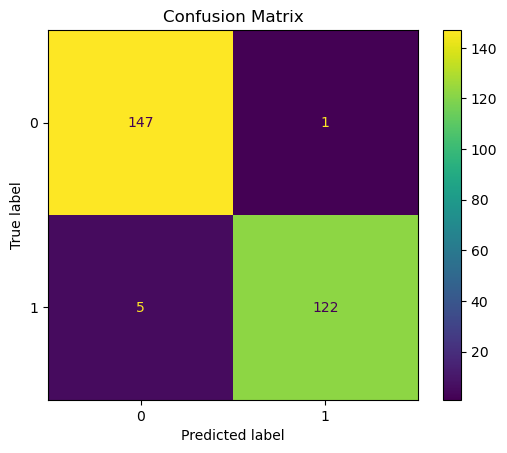

In [13]:
# Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
disp.ax_.set_title("Confusion Matrix")
plt.show()

Let us visualize the decision tree we just created:

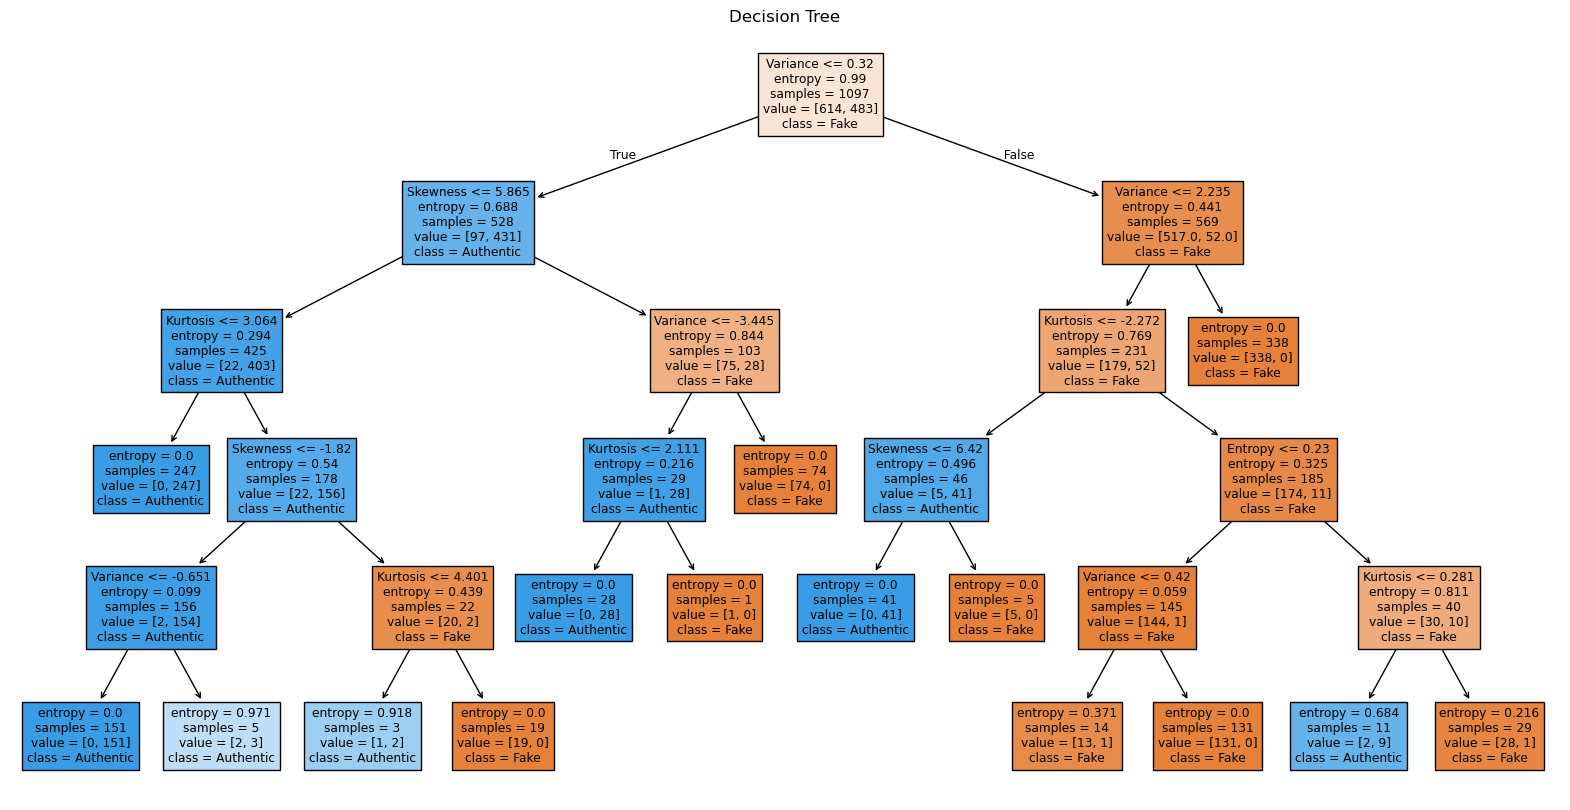

In [15]:
# Visualizing the trained decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Fake', 'Authentic'])
plt.title("Decision Tree")
plt.show()

# Deeper trees are harder to interpret. Depth of a value '4' is readable and fine. But we applied a max_depth value of '5' --
# to increase the variety of tests

Feature importance plot to see which feature affects the most:

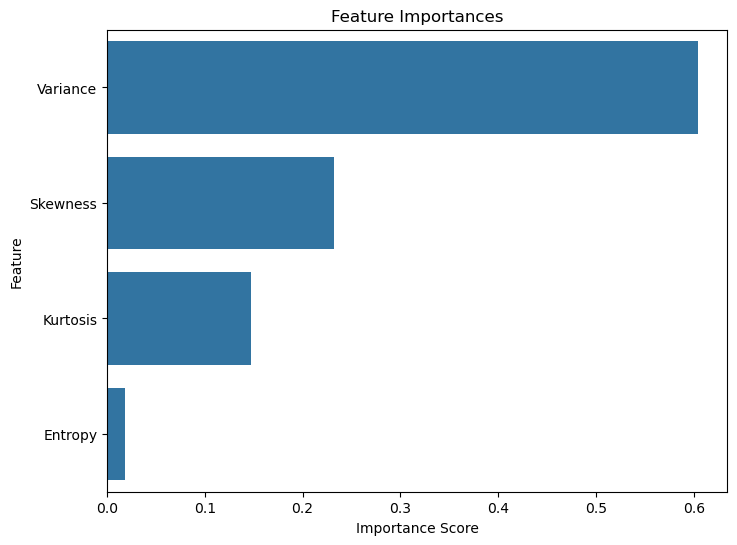

In [16]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plotting feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()